In [1]:
%load_ext autoreload
%autoreload 2

from nerfstudio.model_components.nesf_components import *
import torch
from torch.profiler import profile, record_function, ProfilerActivity

/data/vision/polina/projects/wmh/dhollidt/conda/envs/nerfstudio2/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /data/vision/polina/projects/wmh/dhollidt/conda/envs/nerfstudio2/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
model = TranformerEncoderModelConfig(
    num_layers=8,
    num_heads=8,
    dim_feed_forward=128,
    feature_dim=128,
    ).setup(input_size=103)

model = StratifiedTransformerWrapperConfig().setup(input_size=103)

# model prameters
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

grid_size 0.004
quant_size 0.001
window_size 4
patch_size 1
patch_size 0.004
patch_size 0.004
window_sizes [0.016, 0.032, 0.064, 0.128]
grid_sizes [0.004, 0.008, 0.016, 0.032]
quant_sizes [0.001, 0.002, 0.004, 0.008]
8089680


In [3]:
model.to("cuda:0")
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(next(model.parameters()).device)


cuda:0


In [15]:
for i in range(10):
    input_data = torch.randn(1, 128000, 103, device="cuda:0", requires_grad=True)
    points_xyz = torch.randn(1, 128000, 3, device="cuda:0", requires_grad=False)
    output_data = torch.randn(1, 128000, 128, device="cuda:0")
    out = model(input_data, batch={"points_xyz": points_xyz})
    print(f"Current memory usage: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
    torch.cuda.empty_cache()
    print(f" After clear  - Current memory usage: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
    
    

StratifiedTransformerWrapper forward time:  5.332539081573486

Current memory usage: 4115.36 MB
 After clear  - Current memory usage: 4115.36 MB


StratifiedTransformerWrapper forward time:  5.1529700756073

Current memory usage: 4116.01 MB
 After clear  - Current memory usage: 4116.01 MB


StratifiedTransformerWrapper forward time:  5.439337730407715

Current memory usage: 4116.06 MB
 After clear  - Current memory usage: 4116.06 MB


StratifiedTransformerWrapper forward time:  5.229464292526245

Current memory usage: 4114.39 MB
 After clear  - Current memory usage: 4114.39 MB


StratifiedTransformerWrapper forward time:  5.199592113494873

Current memory usage: 4113.46 MB
 After clear  - Current memory usage: 4113.46 MB


StratifiedTransformerWrapper forward time:  5.5295281410217285

Current memory usage: 4113.12 MB
 After clear  - Current memory usage: 4113.12 MB


StratifiedTransformerWrapper forward time:  5.329776287078857

Current memory usage: 4114.76 MB
 After clear  - Current memory usage: 4114.76 MB


StratifiedTransformerWrapper forward time:  5.297401666641235

Current memory usage: 4115.49 MB
 After clear  - Current memory usage: 4115.49 MB


StratifiedTransformerWrapper forward time:  5.195030927658081

Current memory usage: 4114.41 MB
 After clear  - Current memory usage: 4114.41 MB


StratifiedTransformerWrapper forward time:  5.332430362701416

Current memory usage: 4117.58 MB
 After clear  - Current memory usage: 4117.58 MB


StratifiedTransformerWrapper forward time:  0.48016786575317383

StratifiedTransformerWrapper forward time:  0.3993723392486572

StratifiedTransformerWrapper forward time:  0.3594224452972412

StratifiedTransformerWrapper forward time:  0.3305337429046631

StratifiedTransformerWrapper forward time:  0.482318639755249

StratifiedTransformerWrapper forward time:  0.321502685546875

Current memory usage: 61.95 MB
Max memory usage: 229.40 MB


StratifiedTransformerWrapper forward time:  0.3587830066680908

StratifiedTransformerWrapper forward time:  0.4535503387451172

StratifiedTransformerWrapper forward time:  0.3151557445526123

StratifiedTransformerWrapper forward time:  0.39609503746032715

StratifiedTransformerWrapper forward time:  0.38425612449645996

Current memory usage: 62.12 MB
Max memory usage: 72.87 MB


StratifiedTransformerWrapper forward time:  0.39000988006591797

StratifiedTransformerWrapper forward time:  0.39855480194091797

StratifiedTransformerWrapper forward time:  0.3925809860229492

StratifiedTransformerWrapper forward time:  0.4179544448852539

StratifiedTransformerWrapper forward time:  0.30950498580932617

Current memory usage: 62.46 MB
Max memory usage: 81.80 MB


StratifiedTransformerWrapper forward time:  0.4850142002105713

StratifiedTransformerWrapper forward time:  0.34949803352355957

StratifiedTransformerWrapper forward time:  0.394578218460083

StratifiedTransformerWrapper forward time:  0.4269425868988037

StratifiedTransformerWrapper forward time:  0.3994874954223633

Current memory usage: 63.15 MB
Max memory usage: 97.57 MB


StratifiedTransformerWrapper forward time:  0.43028903007507324

StratifiedTransformerWrapper forward time:  0.32970714569091797

StratifiedTransformerWrapper forward time:  0.6622068881988525

StratifiedTransformerWrapper forward time:  0.3495488166809082

StratifiedTransformerWrapper forward time:  0.3393857479095459

Current memory usage: 64.53 MB
Max memory usage: 133.77 MB


StratifiedTransformerWrapper forward time:  0.3780546188354492

StratifiedTransformerWrapper forward time:  0.38126587867736816

StratifiedTransformerWrapper forward time:  0.5051140785217285

StratifiedTransformerWrapper forward time:  0.30080199241638184

StratifiedTransformerWrapper forward time:  0.3607463836669922

Current memory usage: 67.29 MB
Max memory usage: 204.42 MB


StratifiedTransformerWrapper forward time:  0.4180600643157959

StratifiedTransformerWrapper forward time:  0.5621168613433838

StratifiedTransformerWrapper forward time:  0.3732872009277344

StratifiedTransformerWrapper forward time:  0.36989736557006836

StratifiedTransformerWrapper forward time:  0.3526296615600586

Current memory usage: 73.80 MB
Max memory usage: 348.99 MB


StratifiedTransformerWrapper forward time:  0.8835210800170898

StratifiedTransformerWrapper forward time:  0.4397616386413574

StratifiedTransformerWrapper forward time:  0.4289538860321045

StratifiedTransformerWrapper forward time:  0.5958101749420166

StratifiedTransformerWrapper forward time:  0.49665164947509766

Current memory usage: 83.84 MB
Max memory usage: 632.09 MB


StratifiedTransformerWrapper forward time:  0.7235066890716553

StratifiedTransformerWrapper forward time:  0.9367644786834717

StratifiedTransformerWrapper forward time:  0.6797940731048584

StratifiedTransformerWrapper forward time:  0.8819441795349121

StratifiedTransformerWrapper forward time:  0.7622120380401611

Current memory usage: 106.84 MB
Max memory usage: 1201.96 MB


StratifiedTransformerWrapper forward time:  2.0666534900665283

StratifiedTransformerWrapper forward time:  1.7351932525634766

StratifiedTransformerWrapper forward time:  1.703500509262085

StratifiedTransformerWrapper forward time:  1.7420198917388916

StratifiedTransformerWrapper forward time:  1.8956401348114014

Current memory usage: 150.02 MB
Max memory usage: 2338.01 MB


StratifiedTransformerWrapper forward time:  5.455312490463257

StratifiedTransformerWrapper forward time:  5.440865516662598

StratifiedTransformerWrapper forward time:  5.4075026512146

StratifiedTransformerWrapper forward time:  5.461700677871704

StratifiedTransformerWrapper forward time:  5.496267795562744

Current memory usage: 239.27 MB
Max memory usage: 4614.78 MB
[128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65535, 131072]
[229.40185546875, 72.8740234375, 81.80126953125, 97.57373046875, 133.76806640625, 204.41650390625, 348.9931640625, 632.0888671875, 1201.96337890625, 2338.0078125, 4614.77587890625]
Input memory usage: 51.5 MB
Out memory usage: 24.0 MB
Loss memory usage: 3.814697265625e-06 MB


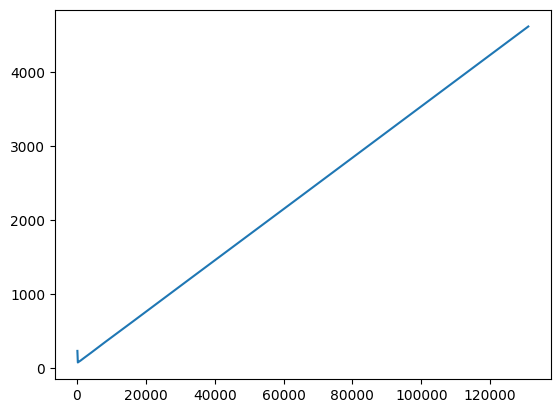

In [19]:
input_data = torch.randn(1, 128, 103, device="cuda:0", requires_grad=True)
points_xyz = torch.randn(1, 128, 3, device="cuda:0", requires_grad=False)
output_data = torch.randn(1, 128, 128, device="cuda:0")
out = model(input_data, batch={"points_xyz": points_xyz})
torch.cuda.reset_peak_memory_stats()
B = 1
S = 128

BS = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65535, 131072]
mems = []
for S in  BS:
    for i in range(5):
        input_data = torch.randn(B, S, 103, device="cuda:0", requires_grad=True)
        points_xyz = torch.rand(B, S, 3, device="cuda:0", requires_grad=False)
        output_data = torch.randn(B, S, 48, device="cuda:0")
        out = model(input_data, batch={"points_xyz": points_xyz})
        loss = torch.nn.functional.mse_loss(output_data, out)
        loss.backward()
        optimizer.step()

    print(f"Current memory usage: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
    print(f"Max memory usage: {torch.cuda.max_memory_allocated() / 1024**2:.2f} MB")
    
    mems.append(torch.cuda.max_memory_allocated() / 1024**2)
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    
    
print(BS)
print(mems)

# plot BS agains mems
import matplotlib.pyplot as plt
fig = plt.plot(BS, mems)

# memory usage of out loss and input_data
print("Input memory usage:", input_data.element_size() * input_data.nelement() / 1024**2, "MB")
print("Out memory usage:", out.element_size() * out.nelement() / 1024**2, "MB")
print("Loss memory usage:", loss.element_size() * loss.nelement() / 1024**2, "MB")

In [3]:
input_data = torch.randn(1, 128, 103, device="cuda:0", requires_grad=True)
output_data = torch.randn(1, 128, 128, device="cuda:0")
out = model(input_data, batch={})
torch.cuda.reset_peak_memory_stats()
B = 2
S = 128

BS = [1,2,3,4,6, 8, 10]
mems = []
for B in  BS:
    with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],
            profile_memory=True, record_shapes=True, with_stack=False) as prof:
        for i in range(5):
            input_data = torch.randn(B, S, 103, device="cuda:0", requires_grad=True)
            output_data = torch.randn(B, S, 128, device="cuda:0")
            out = model(input_data, batch={})
            loss = torch.nn.functional.mse_loss(output_data, out)
            loss.backward()
            optimizer.step()

    print(f"Current memory usage: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
    print(f"Max memory usage: {torch.cuda.max_memory_allocated() / 1024**2:.2f} MB")
    
    mems.append(torch.cuda.max_memory_allocated() / 1024**2)
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    
    
print(BS)
print(mems)

# plot BS agains mems
import matplotlib.pyplot as plt
fig = plt.plot(BS, mems)

# memory usage of out loss and input_data
print("Input memory usage:", input_data.element_size() * input_data.nelement() / 1024**2, "MB")
print("Out memory usage:", out.element_size() * out.nelement() / 1024**2, "MB")
print("Loss memory usage:", loss.element_size() * loss.nelement() / 1024**2, "MB")

NameError: name 'torch' is not defined

## B = 1, S = 2048
Max memory usage: 2618.83 MB

## B = 1, S = 2048


In [11]:
del optimizer

In [28]:
torch.cuda.empty_cache()

In [5]:
print(out.shape)
print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

torch.Size([1, 128, 128])
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                            aten::empty         0.84%      17.213ms         0.91%      18.798ms       8.743us       0.000us         0.00%       7.000us       0.003us       2.62 Kb       2.62 Kb 

In [12]:
print(prof.key_averages(group_by_stack_n=5).table(sort_by='self_cpu_time_total', row_limit=5))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                             aten::view        16.85%     346.283ms        16.85%     346.283ms     223.408us       0.000us         0.00%       0.000us       0.000us           0 b           0 b           0 b           0 

In [11]:


summary(transformer, input_size=(1, 3000, 48))


NameError: name 'summary' is not defined

In [13]:
torch.cuda.mem_get_info()


(13698990080, 16900292608)

In [21]:
memory_stats = torch.cuda.memory_stats()

In [24]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 1            |        cudaMalloc retries: 1         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    4117 MB |   10117 MB |  149032 MB |  144914 MB |
|       from large pool |    4043 MB |   10043 MB |  144985 MB |  140942 MB |
|       from small pool |      73 MB |     130 MB |    4046 MB |    3972 MB |
|---------------------------------------------------------------------------|
| Active memory         |    4117 MB |   10117 MB |  149032 MB |  144914 MB |
|       from large pool |    4043 MB |   10043 MB |  144985 MB |

In [27]:
import gc

total = 0
for obj in gc.get_objects():
    if torch.is_tensor(obj) and obj.is_cuda:
        print(f"Tensor of shape {obj.size()} - {obj.element_size() * obj.nelement() / 1024**2:.2f} MB")
        total += obj.element_size() * obj.nelement() / 1024**2
        del obj
print("total", total)

Tensor of shape torch.Size([15, 3]) - 0.00 MB
Tensor of shape torch.Size([15, 103, 48]) - 0.28 MB
Tensor of shape torch.Size([48]) - 0.00 MB
Tensor of shape torch.Size([48]) - 0.00 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([64, 24, 16, 3]) - 0.28 MB
Tensor of shape torch.Size([64, 24, 16, 3]) - 0.28 MB
Tensor of shape torch.Size([64, 24, 16, 3]) - 0.28 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([64, 24, 16, 3]) - 0.28 MB
Tensor of shape torch.Size([64, 24, 16, 3]) - 0.28 MB
Tensor of shape torch.Size([64, 24, 16, 3]) - 0.28 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([384]) - 0.00 MB
Tensor of shape torch.Size([1152, 384]) - 1.69 MB
Tensor of shape torch.Size([1152]) - 0.00 MB
Tensor of shape torch.Size([384, 384]) - 0.56

/data/vision/polina/projects/wmh/dhollidt/conda/envs/nerfstudio2/lib/python3.8/site-packages/torch/distributed/distributed_c10d.py:262: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


In [33]:
torch.cuda.memory_snapshot()

[{'device': 0,
  'address': 140565677080576,
  'total_size': 134217728,
  'allocated_size': 80216064,
  'active_size': 80216064,
  'stream': 0,
  'segment_type': 'large',
  'blocks': [{'size': 54001664, 'state': 'active_allocated'},
   {'size': 54001664, 'state': 'inactive'},
   {'size': 26214400, 'state': 'active_allocated'}]},
 {'device': 0,
  'address': 140567287693312,
  'total_size': 2097152,
  'allocated_size': 512,
  'active_size': 512,
  'stream': 0,
  'segment_type': 'small',
  'blocks': [{'size': 2096128, 'state': 'inactive'},
   {'size': 512, 'state': 'active_allocated'},
   {'size': 512, 'state': 'inactive'}]},
 {'device': 0,
  'address': 140567293984768,
  'total_size': 2097152,
  'allocated_size': 512,
  'active_size': 512,
  'stream': 0,
  'segment_type': 'small',
  'blocks': [{'size': 1771008, 'state': 'inactive'},
   {'size': 512, 'state': 'active_allocated'},
   {'size': 325632, 'state': 'inactive'}]},
 {'device': 0,
  'address': 140567325442048,
  'total_size': 20971

In [20]:
mb_to_allocate  = 5000
tensor = torch.zeros((1024**2 * mb_to_allocate // 4,), device="cuda")

In [23]:
torch.cuda.empty_cache()

In [22]:
del tensor

In [4]:
import torch
encoder_layer = torch.nn.TransformerEncoderLayer(
            64,
            8,
            64,
            0.2,
            batch_first=True,
        )
transformer_encoder = torch.nn.TransformerEncoder(encoder_layer, 6)
transformer_encoder.to("cuda:0")

for i in range(16):
    length = 2**i
    input_data = torch.randn(1, length, 64, device="cuda:0", requires_grad=True)
    output = transformer_encoder(input_data)

    print(f"{length} max memory usage: {torch.cuda.max_memory_allocated() / 1024**2:.2f} MB")
    torch.cuda.reset_peak_memory_stats()


1 max memory usage: 119.06 MB
2 max memory usage: 2.29 MB
4 max memory usage: 2.32 MB
8 max memory usage: 2.43 MB
16 max memory usage: 2.71 MB
32 max memory usage: 3.49 MB
64 max memory usage: 5.83 MB
128 max memory usage: 13.67 MB
256 max memory usage: 42.02 MB
512 max memory usage: 149.37 MB
1024 max memory usage: 566.56 MB
2048 max memory usage: 2210.94 MB
4096 max memory usage: 8739.99 MB


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 GiB (GPU 0; 15.74 GiB total capacity; 11.35 GiB already allocated; 1.87 GiB free; 13.10 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF